In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import ffta
from ffta.simulation import mechanical_drive

c:\test_pycroscopy\ffta\ffta\pixel_utils\parab.py:8: UserWarning: cuPy not installed; no GPU available
  warnings.warn('cuPy not installed; no GPU available')


In [ ]:
params_url = 'https://raw.githubusercontent.com/rajgiriUW/ffta/master/ffta/simulation/example_params/example_sim_params.cfg'
params = ffta.simulation.utils.load.simulation_configuration(params_url, is_url=True)
params[0]['total_time'] = 0.005
params[1]['tau'] = 1e-4

# Cantilever Simulate
c = mechanical_drive.MechanicalDrive(*params)
Z,_ = c.simulate()
'''
url에서 가져온 data

[Cantilever Parameters]
amp_invols = 4.934e-08      ;in m/V.
def_invols = 4.527e-08      ;in m/V.
soft_amp = 0.3              ;in m/V
drive_freq = 277261         ;in Hz.
res_freq = 277261           ;in m.
k = 22.77                   ;in N/m.
q_factor = 475.107

[Force Parameters]
es_force = 3.09e-9          ;in N.
delta_freq = -277.53        ;in Hz.
tau = 1e-7                  ;in seconds.

[Simulation Parameters]
trigger = 0.5e-3         ;in seconds.
total_time = 1e-3      ;in seconds.
sampling_rate = 1e7         ;in Hz.
'''

C:\Users\pmsda\AppData\Local\Temp\ipykernel_16800\2055438330.py:1: DeprecationWarning: This class will be rename "FFTA" in next major release.
  pix = ffta.pixel.Pixel(Z, trigger=5e-4, total_time=5e-3, roi=1e-3)


Text(0.5, 1.0, 'Cantilever deflection')

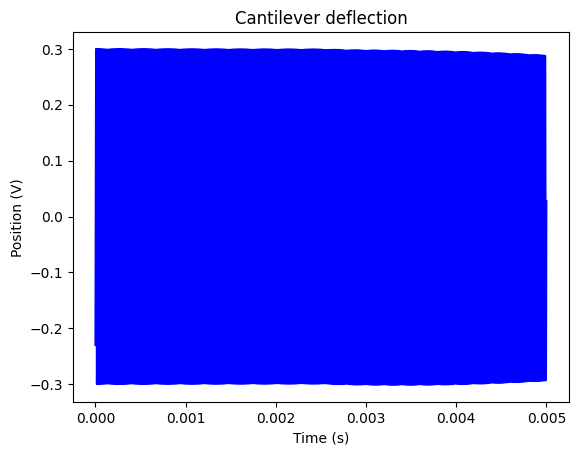

In [14]:
pix = ffta.pixel.Pixel(Z, trigger=5e-4, total_time=5e-3, roi=1e-3)
Z /= params[0]['amp_invols']
plt.plot(np.arange(0, pix.total_time, 1/pix.sampling_rate), Z, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Position (V)')
plt.title('Cantilever deflection')

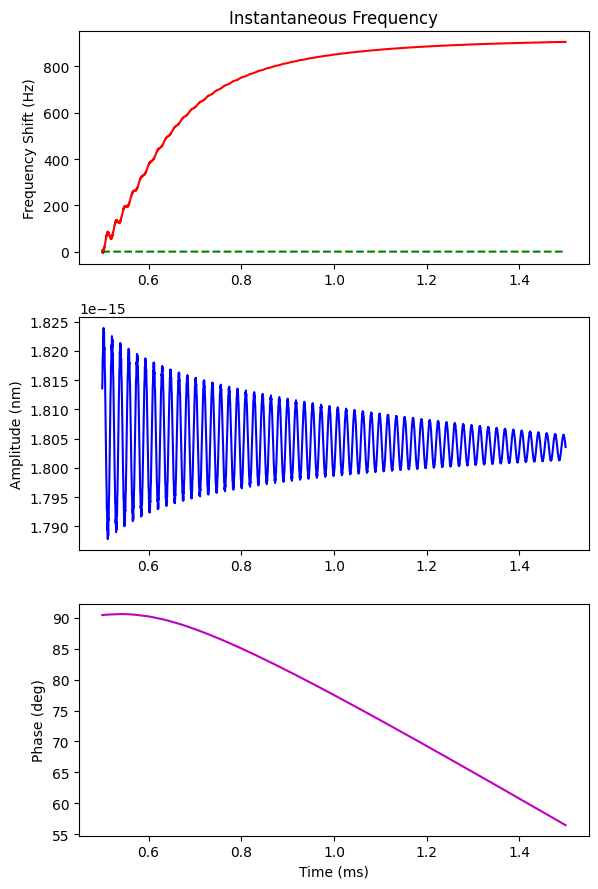

In [15]:
pix.analyze()
pix.plot()

c:\test_pycroscopy\ffta\ffta\pixel_utils\fitting.py:29: RuntimeWarning: overflow encountered in exp
  decay = np.exp(-t / tau1) - 1
c:\test_pycroscopy\ffta\ffta\pixel_utils\fitting.py:32: RuntimeWarning: overflow encountered in multiply
  return A * decay * relaxation
c:\test_pycroscopy\ffta\ffta\pixel_utils\fitting.py:188: RuntimeWarning: overflow encountered in square
  cost = lambda p: np.sum((ddho_freq_product(t, *p) - inst_freq) ** 2)
c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


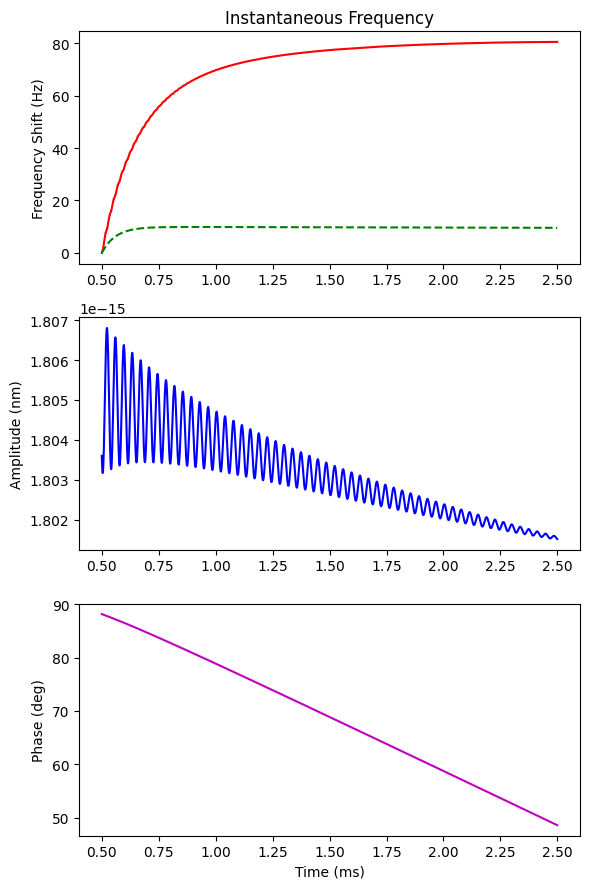

In [ ]:
pix.n_taps = 500
pix.filter_amplitude = True
# Region of Interest / 2e-3초만 보여준다.    
pix.roi = 2e-3
pix.analyze()
pix.plot()

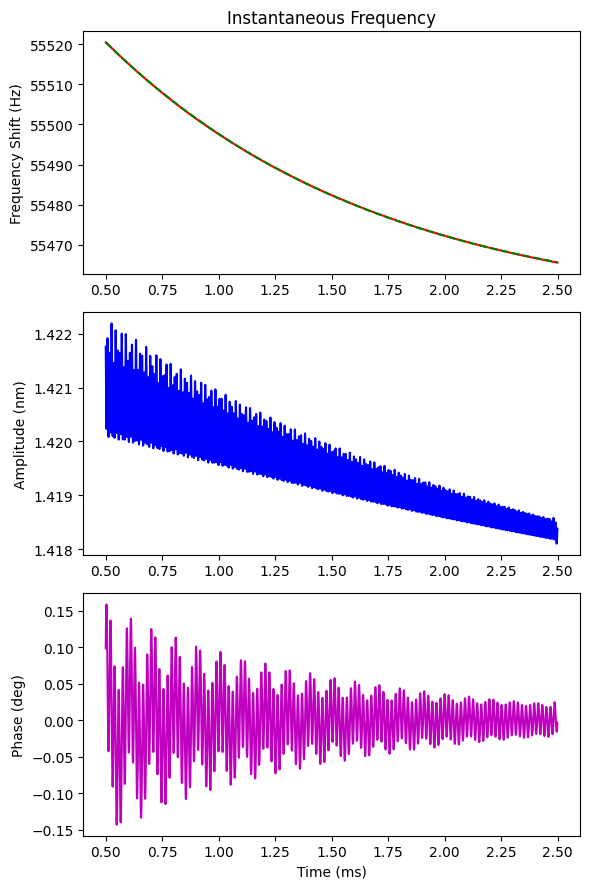

In [28]:
pix.method = 'nfmd'
# pix.analyze() / nfmd만 출력이 너무 많이 나옴
pix.plot()

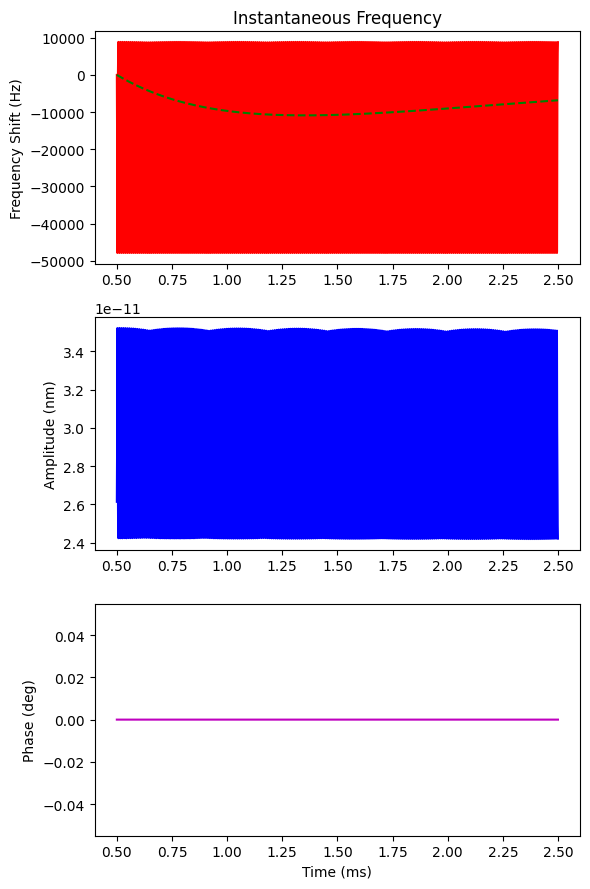

In [35]:
# hilbert: Hilbert transform method (default)
# wavelet: Morlet CWT approach
# stft: short time Fourier transform (sliding FFT)
# nfmd: Nonstationary Fourier mode decomposition
pix.method = 'stft'
pix.analyze() 
pix.plot()

Text(0.5, 1.0, 'STFT Spectrogram')

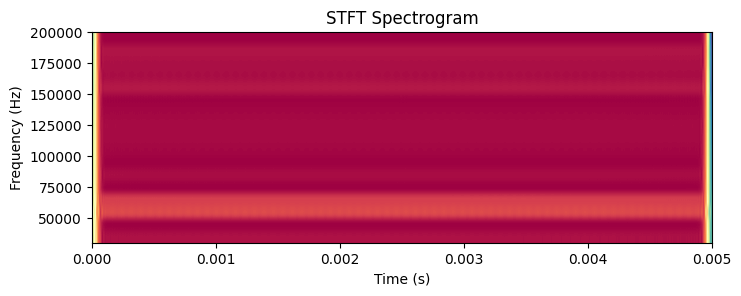

In [ ]:
fig,ax = plt.subplots(figsize = (8,6),facecolor = 'white')
ax.imshow(pix.spectrogram[3:20,:],cmap = "Spectral",origin = 'lower',aspect = 1e-8,
          extent = [0,5e-3,pix.stft_freq[3],pix.stft_freq[20]])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('STFT Spectrogram')

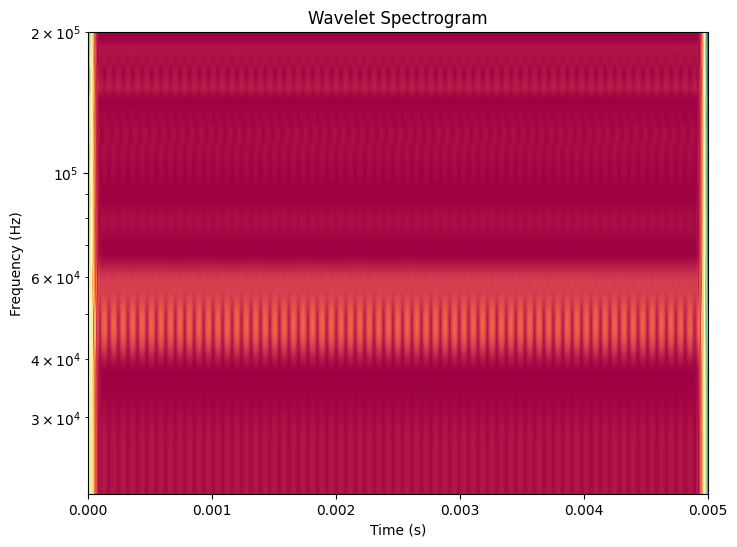

In [39]:
pix.method = 'wavelet'
pix.analyze() 
min_freq = min(pix.stft_freq[3], pix.wavelet_freq[3])
max_freq = max(pix.stft_freq[20], pix.wavelet_freq[20])

fig,ax = plt.subplots(figsize = (8,6),facecolor = 'white')
ax.imshow(pix.spectrogram[3:20,:], cmap="Spectral", origin='lower', aspect='auto',
          extent=[0, 5e-3, min_freq, max_freq])

ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Wavelet Spectrogram')
ax.set_yscale('log')

Text(0.5, 1.0, 'STFT Spectrogram')

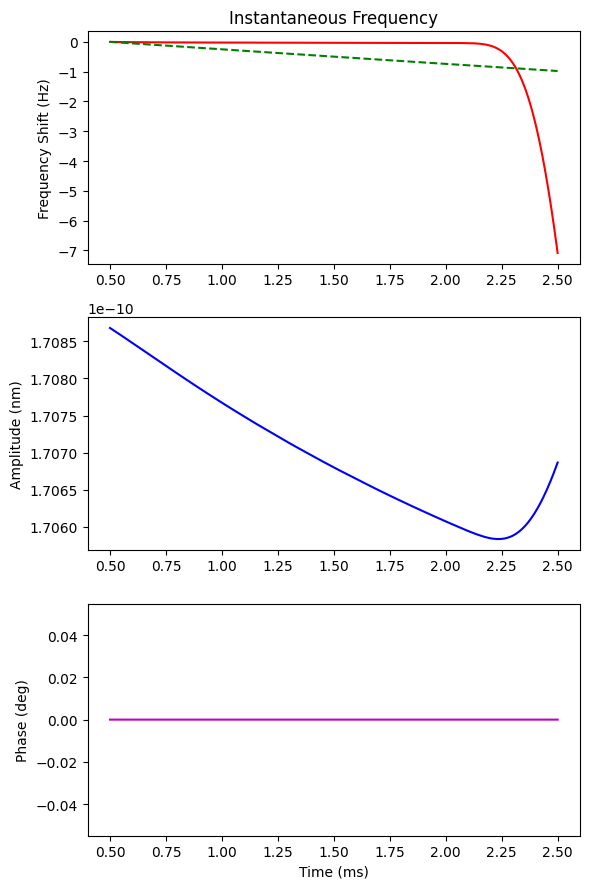

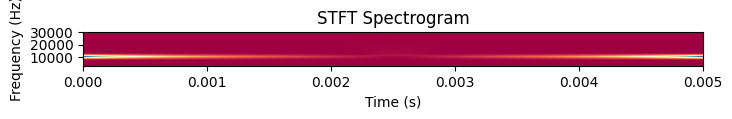

In [54]:
pix.method = 'stft'
pix.fft_time_res = 10e-4
pix.analyze()
pix.plot()

fig, ax = plt.subplots(figsize=(8,6), facecolor='white')
ax.imshow(pix.spectrogram[3:30,:], cmap='Spectral', origin='lower', aspect=1e-8, 
           extent=[0, 5e-3, pix.stft_freq[3], pix.stft_freq[30]])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('STFT Spectrogram')